In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sb
# Importing csv file as dataframe
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

# **CLASSIFIER *AND* EVALUATION**

In [2]:
# This function used to plot confusion matrix and give classification report.
# It is also used for training and predicting values and calculating accuracy
def Output(column_name, x_train, x_test, y_train, y_test):
  print('KNN \n')
  clf = KNeighborsClassifier(n_neighbors=2) # Used KNN as classifier for best results and also checked with svm.SVC()
  clf.fit(x_train, y_train) # Training model
  predicted_y_test = clf.predict(x_test)
  print('******************************',column_name,'*******************************','\n')
  cm=confusion_matrix(y_test, predicted_y_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  mp.show() # Plotting Confusion marix
  tn, fp, fn, tp = confusion_matrix(y_test, predicted_y_test).ravel()
  print(classification_report(y_test, predicted_y_test,zero_division=np.random.randint(2))) # Printing classification report
  print('Accuracy: ', accuracy_score(y_test, predicted_y_test), '\n')

  print('SVC \n')
  clf = svm.SVC() # Used KNN as classifier for best results and also checked with svm.SVC()
  clf.fit(x_train, y_train) # Training model
  predicted_y_test = clf.predict(x_test)
  print('******************************',column_name,'*******************************','\n')
  cm=confusion_matrix(y_test, predicted_y_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  mp.show() # Plotting Confusion marix
  tn, fp, fn, tp = confusion_matrix(y_test, predicted_y_test).ravel()
  print(classification_report(y_test, predicted_y_test,zero_division=np.random.randint(2))) # Printing classification report
  print('Accuracy: ', accuracy_score(y_test, predicted_y_test), '\n')

# ***DATA PREPROCESSING***

In [3]:
# Dealing with missing values
data = data.apply(pd.to_numeric, errors='coerce')
data.drop_duplicates(inplace = True)
r = data.isnull().sum()
v = (2*data.shape[0])/3
r=r[r>v]
data = data.drop(r.index, axis=1)
r=data.isnull().sum()
m=data.mean(numeric_only=True)
data.fillna(m,inplace=True)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.000000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.000000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.000000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# ***DATA VISUALIZATION***

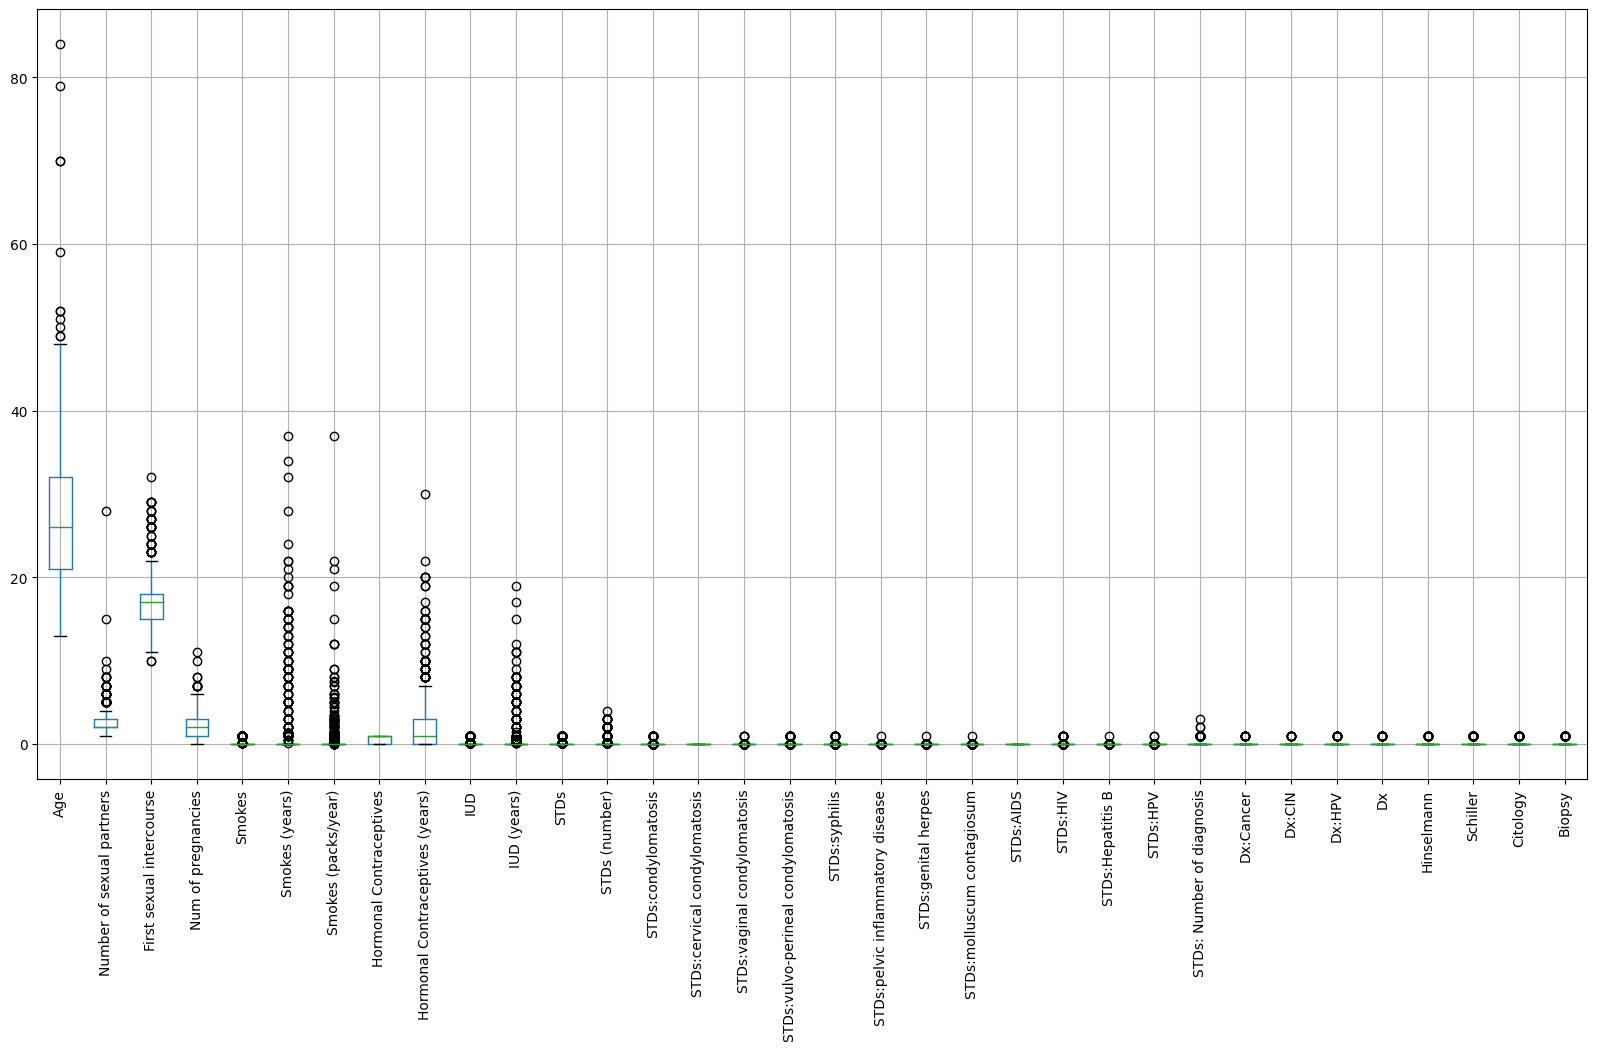

In [4]:
mp.figure(figsize=(20, 10))
data.boxplot()
mp.xticks(rotation=90)
mp.show()

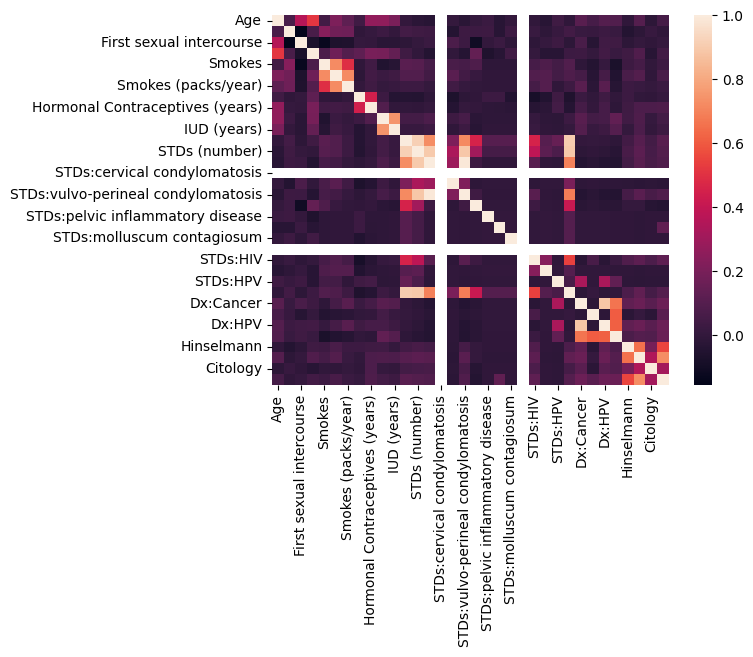

In [5]:
df=sb.heatmap(data.corr())
mp.show()

# ***DATA SPLITTING***

In [6]:
x_data = data.iloc[:, :-4]
y_data = data.iloc[:, -4:]
a=y_data.iloc[:,0]
b=y_data.iloc[:,1]
c=y_data.iloc[:,2]
d=y_data.iloc[:,3]
stratify_value=(a*b*c*d+a+b+c+d+a*b+a*c+a*d+b*c+b*d+c*d+a*b*c+a*b*d+b*c*d+a*c*d)
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, train_size=0.8, stratify=stratify_value)

# ***DATA PREPROCESSING***

In [7]:
# Data Normalization
scaler = preprocessing.MinMaxScaler()
for col in x_train.columns:
    x_train[col]=scaler.fit_transform(pd.DataFrame(x_train[col]))

In [8]:
# Removing outliers
q1 = x_train.quantile(0.1)
q3 = x_train.quantile(0.9)
iqr = q3 - q1
def is_outlier(row):
    if row.eq(1).any():
        return True
    return ~((row < (q1 -iqr)) | (row > (q3 + iqr))).any()

a=x_train.apply(is_outlier, axis=1)
x_train = x_train.loc[a,:]
y_train = y_train.loc[a,:]
x_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
205,0.169014,0.074074,0.318182,0.181818,0.0,0.000000,0.000000,1.000000,0.002667,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
353,0.112676,0.037037,0.136364,0.181818,0.0,0.000000,0.000000,0.651639,0.076764,0.114799,...,0.001361,0.0,0.02449,0.001361,0.002721,0.0,0.0,0.0,0.0,0.0
643,0.028169,0.111111,0.181818,0.090909,1.0,0.027027,0.002703,1.000000,0.002667,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
107,0.281690,0.148148,0.409091,0.090909,1.0,0.108108,0.013870,1.000000,0.076073,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
747,0.112676,0.000000,0.363636,0.090909,0.0,0.000000,0.000000,1.000000,0.066667,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.084507,0.000000,0.272727,0.090909,0.0,0.000000,0.000000,0.651639,0.076764,0.114799,...,0.001361,0.0,0.02449,0.001361,0.002721,0.0,0.0,0.0,0.0,0.0
371,0.154930,0.111111,0.318182,0.090909,1.0,0.243243,0.060811,1.000000,0.033333,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
724,0.239437,0.000000,0.545455,0.181818,0.0,0.000000,0.000000,1.000000,0.005333,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
582,0.098592,0.111111,0.227273,0.181818,0.0,0.000000,0.000000,1.000000,0.166667,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# ***DATA VISUALIZATION***

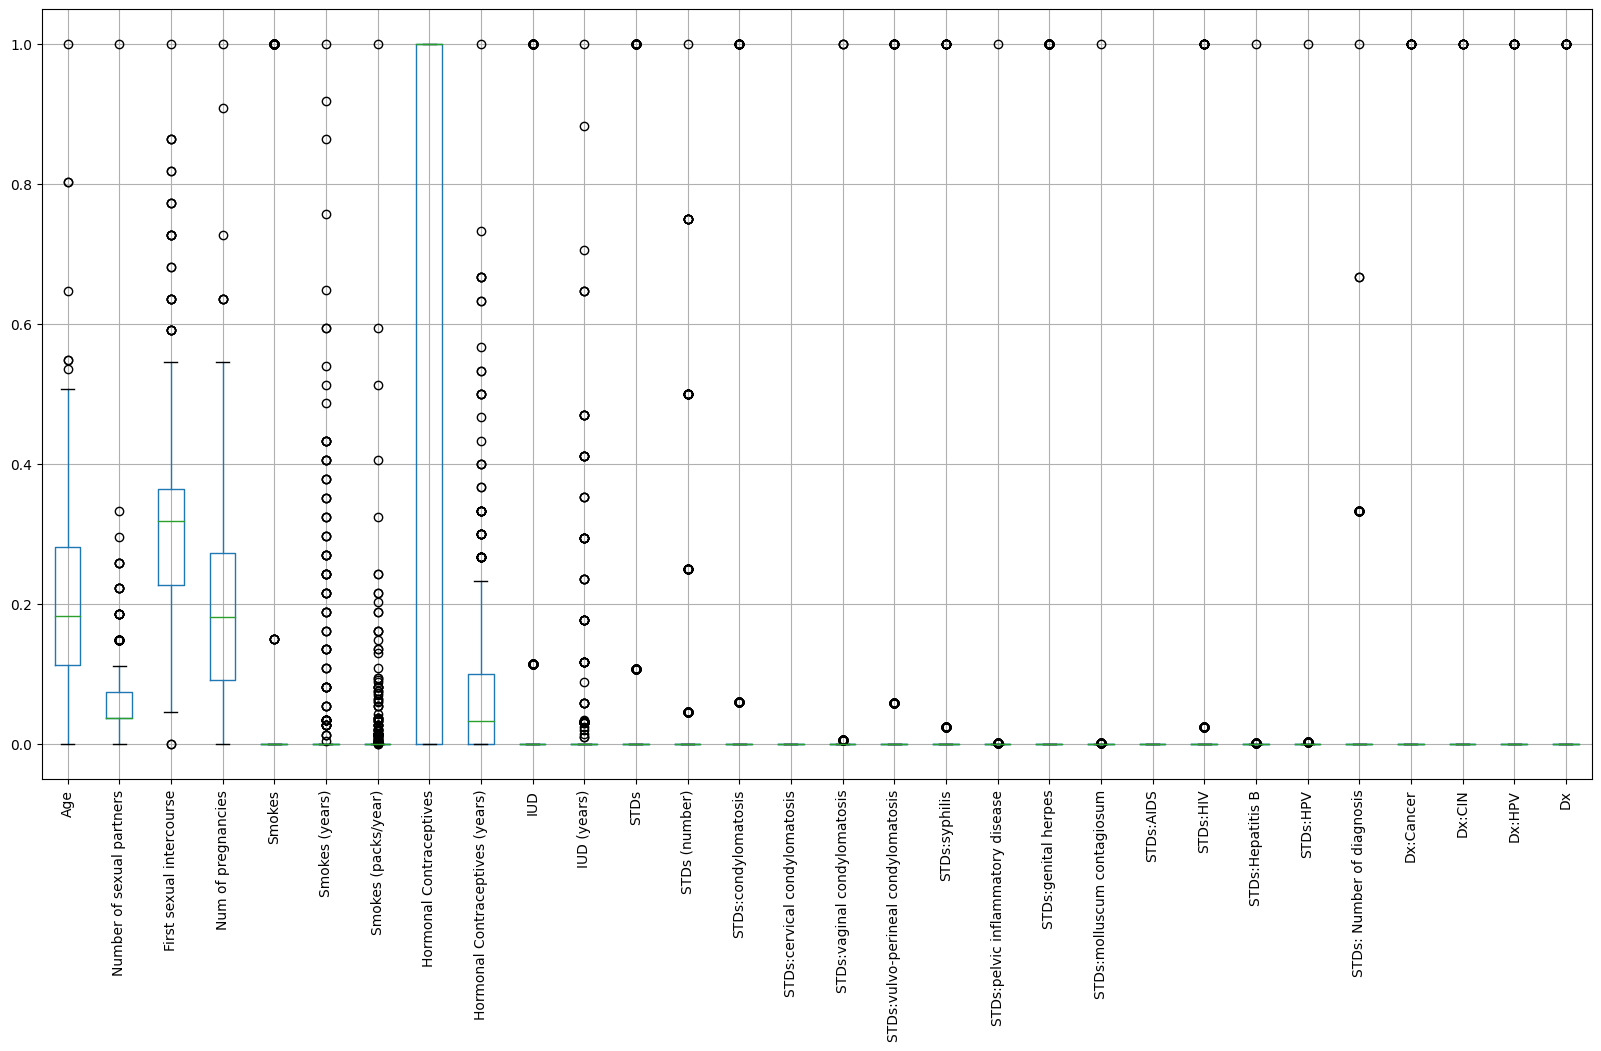

In [9]:
mp.figure(figsize=(20, 10))
x_train.boxplot()
mp.xticks(rotation=90)
mp.show()

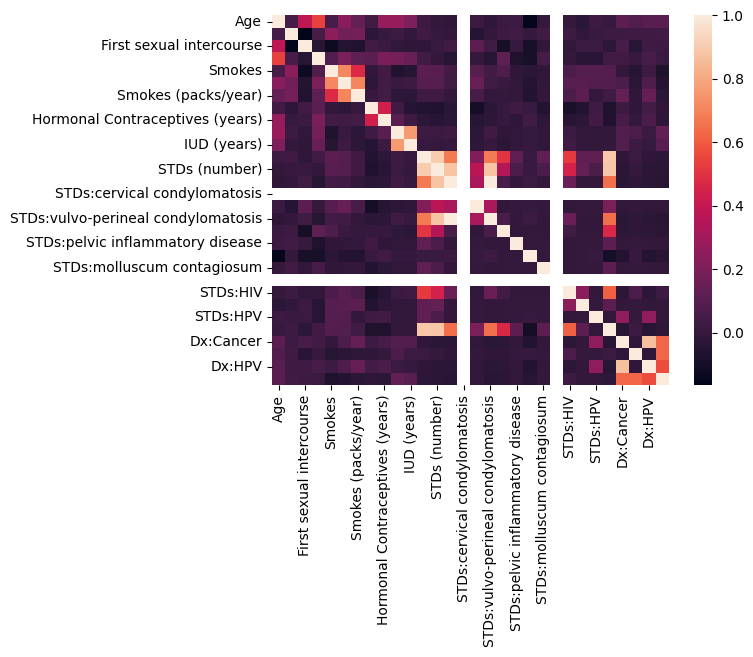

In [10]:
df=sb.heatmap(x_train.corr())
mp.show()

# ***FEATURE EXTRACTION***

In [11]:
pca = PCA(n_components='mle',whiten=True,svd_solver='full')
x_train = pca.fit_transform(x_train)
x_test= pca.transform(x_test)
print(x_train.shape)

(664, 26)


# ***DATA BALANCING AND EVALUATION***

KNN 

****************************** Hinselmann ******************************* 



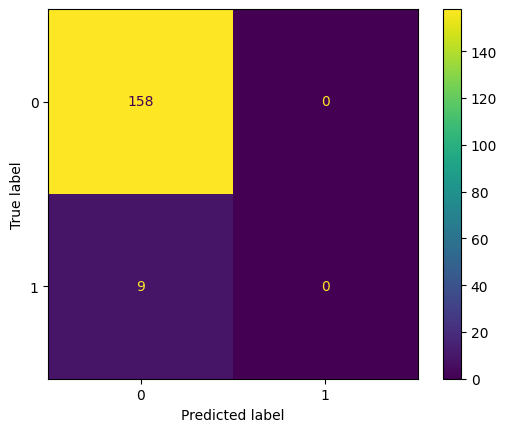

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       158
           1       1.00      0.00      0.00         9

    accuracy                           0.95       167
   macro avg       0.97      0.50      0.49       167
weighted avg       0.95      0.95      0.92       167

Accuracy:  0.9461077844311377 

SVC 

****************************** Hinselmann ******************************* 



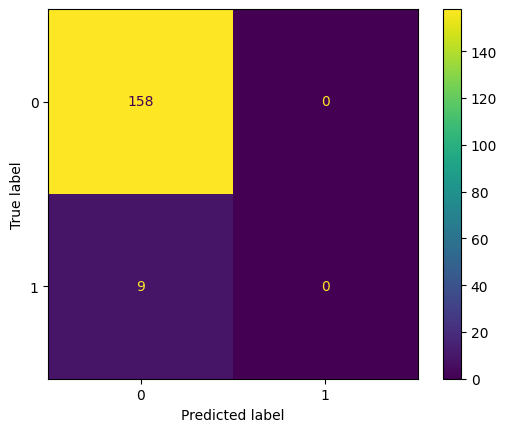

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       158
           1       1.00      0.00      0.00         9

    accuracy                           0.95       167
   macro avg       0.97      0.50      0.49       167
weighted avg       0.95      0.95      0.92       167

Accuracy:  0.9461077844311377 

KNN 

****************************** Schiller ******************************* 



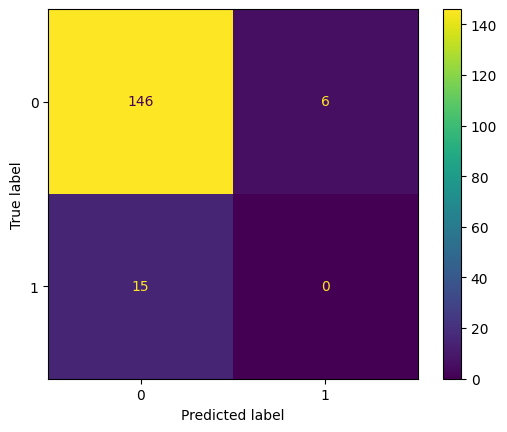

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       152
           1       0.00      0.00      0.00        15

    accuracy                           0.87       167
   macro avg       0.45      0.48      0.47       167
weighted avg       0.83      0.87      0.85       167

Accuracy:  0.874251497005988 

SVC 

****************************** Schiller ******************************* 



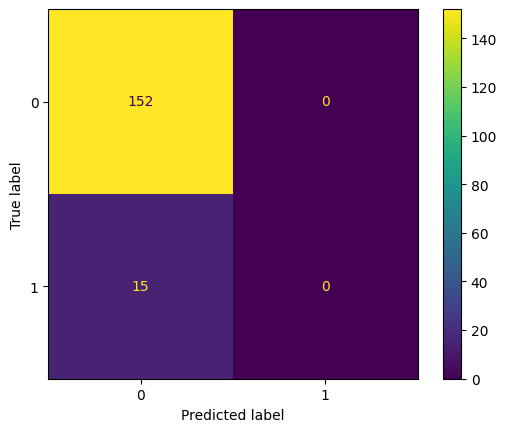

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       152
           1       1.00      0.00      0.00        15

    accuracy                           0.91       167
   macro avg       0.96      0.50      0.48       167
weighted avg       0.92      0.91      0.87       167

Accuracy:  0.9101796407185628 

KNN 

****************************** Citology ******************************* 



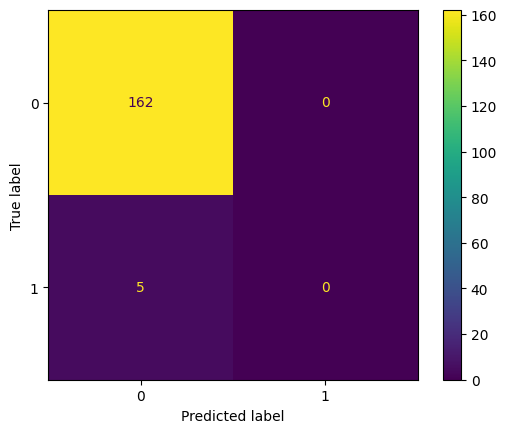

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       162
           1       1.00      0.00      0.00         5

    accuracy                           0.97       167
   macro avg       0.99      0.50      0.49       167
weighted avg       0.97      0.97      0.96       167

Accuracy:  0.9700598802395209 

SVC 

****************************** Citology ******************************* 



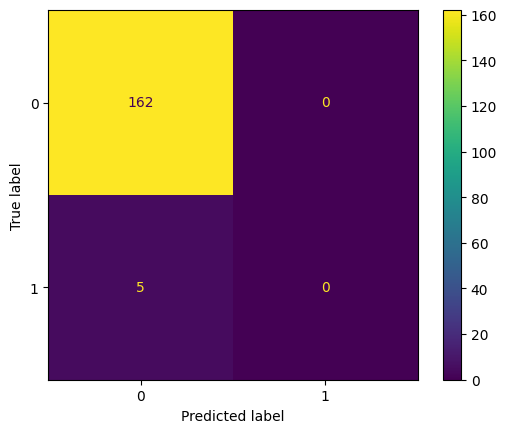

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       162
           1       1.00      0.00      0.00         5

    accuracy                           0.97       167
   macro avg       0.99      0.50      0.49       167
weighted avg       0.97      0.97      0.96       167

Accuracy:  0.9700598802395209 

KNN 

****************************** Biopsy ******************************* 



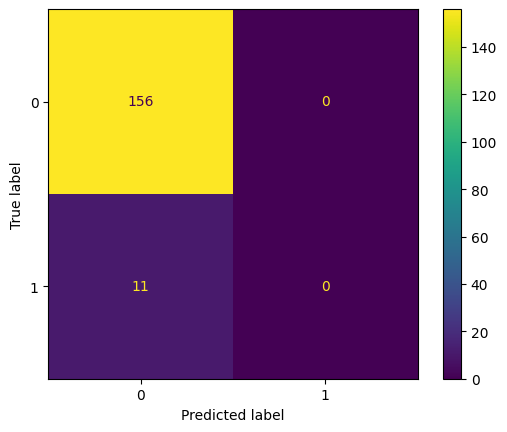

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       156
           1       1.00      0.00      0.00        11

    accuracy                           0.93       167
   macro avg       0.97      0.50      0.48       167
weighted avg       0.94      0.93      0.90       167

Accuracy:  0.9341317365269461 

SVC 

****************************** Biopsy ******************************* 



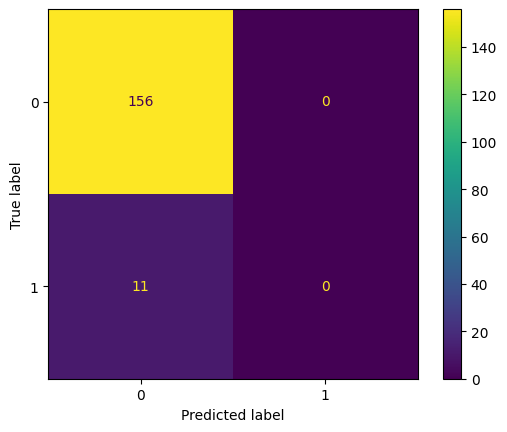

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       156
           1       1.00      0.00      0.00        11

    accuracy                           0.93       167
   macro avg       0.97      0.50      0.48       167
weighted avg       0.94      0.93      0.90       167

Accuracy:  0.9341317365269461 



In [12]:
for i in range(4):
  x_trainf, y_trainf = ADASYN(sampling_strategy='minority').fit_resample(x_train, y_train.iloc[:,i])
  Output(y_test.columns[i], x_trainf, x_test, y_trainf, y_test.iloc[:,i])